In [17]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
# Establecer tamaño fijo de gráficas
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

EJERCICIO 1: Buscar un conjunto de datos a analizar

In [5]:
df=pd.read_csv('../datos/ds_salaries.csv', index_col=0)
df.head(2) #Hacemos una vista previa de nuestro DataFrame

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [7]:
#Primero vamos a ver la forma de nuestro DataFrame.
print(f'Tenemos {df.shape[0]} filas y {df.shape[1]} columnas')

Tenemos 607 filas y 11 columnas


Miramos cuantos nulos tenemos

In [8]:
df.stb.missing()

,missing,total,percent
work_year,0,607,0.0
experience_level,0,607,0.0
employment_type,0,607,0.0
job_title,0,607,0.0
salary,0,607,0.0
salary_currency,0,607,0.0
salary_in_usd,0,607,0.0
employee_residence,0,607,0.0
remote_ratio,0,607,0.0
company_location,0,607,0.0


0 nulos!! Genial!!

Vamos a ver los tipos de datos de nuestras columnas.

In [9]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Genial! Al parecer todas nuestras columnas están con el tipo de dato correcto

Vamos a sacar los principales estadisticos para nuestras columnas numericas.

In [21]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.describe(include='number')

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [22]:
numericas.head()

,work_year,salary,salary_in_usd,remote_ratio
0,2020,70000,79833,0
1,2020,260000,260000,0
2,2020,85000,109024,50
3,2020,20000,20000,0
4,2020,150000,150000,50


Vemos que nuestros datos son de los últimos 2 años, que la media del año es 2021 y que nuestros datos de salario se ven afectados por un posible outlayer, el cual se puede observar en el valor máximo.

Vamos a ver los outlayers graficamente

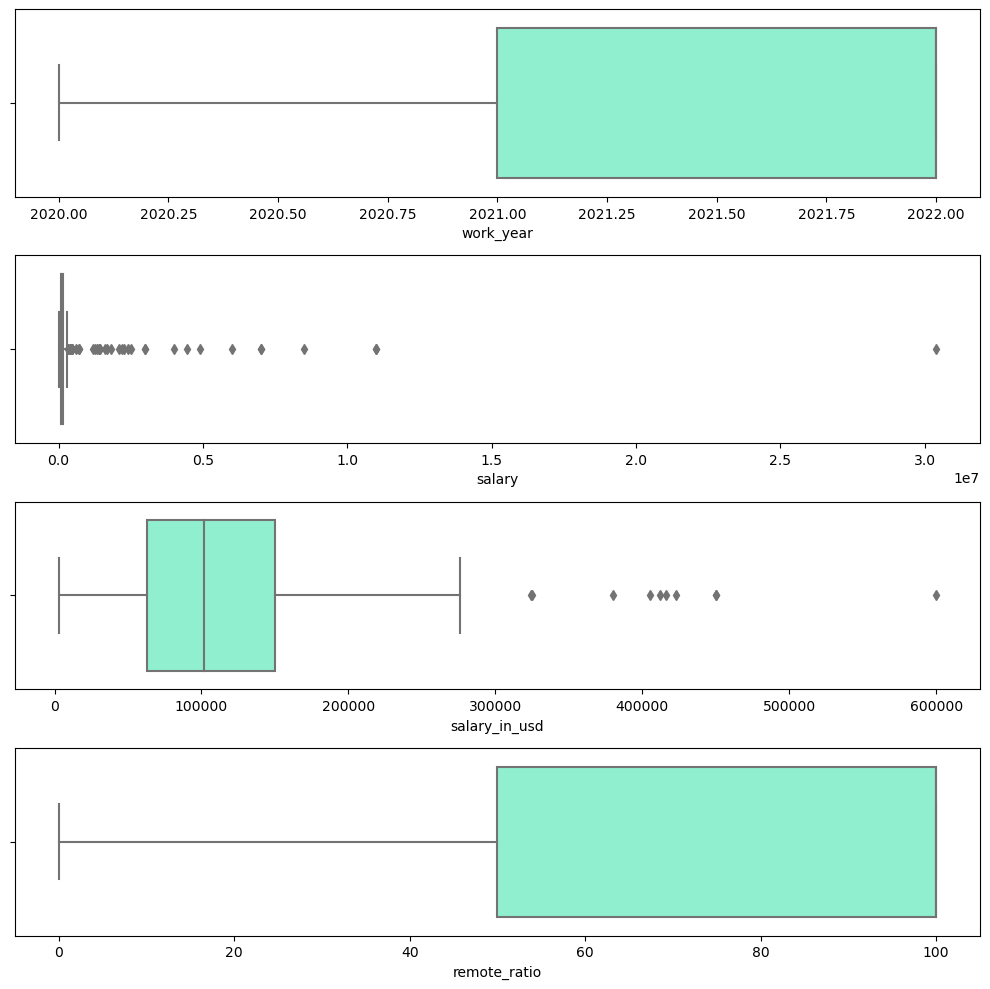

In [27]:
fig, axes = plt.subplots(4, 1, figsize=(10,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = numericas, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad
  
plt.tight_layout()
plt.show()

Ahora para nuestras variables categoricas

In [12]:
df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


Podemos ver que la moda es Data Scientist, que se paga en dólares y que residen que USA,y trabajan en empresas medianas. Y que nuestras columnas de experience_level y employment_type hay que hacerle un replace para que sea entendible las etiquetas de las variables.